In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [159]:
data =pd.read_csv('1.csv')
data

Date   Open   High    Low   Adj Close    Volume      sma      rsi  \
0    2020-07-20  370.0  370.0  362.5  338.222076  42769238  336.775  81.5951   
1    2020-07-21  372.5  387.0  371.5  353.931885  64219128  340.200  84.7716   
2    2020-07-22  381.0  386.0  379.0  354.855896  43759670  343.800  87.1134   
3    2020-07-23  382.0  383.0  379.0  352.545715  45209282  347.125  84.4560   
4    2020-07-24  390.0  395.0  382.0  356.704132  86682734  350.550  84.7716   
..          ...    ...    ...    ...         ...       ...      ...      ...   
839  2023-12-25  582.0  585.0  580.0  576.073059   9548143  577.300  60.6557   
840  2023-12-26  583.0  586.0  582.0  581.030640  16094308  577.850  59.3220   
841  2023-12-27  587.0  592.0  586.0  586.979858  33401336  578.750  64.0625   
842  2023-12-28  592.0  593.0  589.0  587.971313  25514849  579.550  62.9032   
843  2023-12-29  589.0  593.0  589.0  587.971313  18416318  580.250  61.6667   

          ma  std_dev  upperband  lowerband       EMA12       EMA26  \
0    336.775  20.4144   377.6038   295.9462  351.457472  336.949948   
1    340.200  22.1528   384.5056   295.8944  356.310168  340.361063   
2    343.800  23.1564   390.1128   297.4872  360.570142  343.593577   
3    347.125  23.5740   394.2730   299.9770  363.790121  346.401460   
4    350.550  24.0153   398.5806   302.5194  367.207025  349.334685   
..       ...      ...        ...        ...         ...         ...   
839  577.300   5.7317   588.7634   565.8366  579.953886  575.426968   
840  577.850   6.0199   589.8898   565.8102  580.884057  576.210156   
841  578.750   6.7190   592.1880   565.3120  582.594202  577.379774   
842  579.550   7.4160   594.3820   564.7180  584.195094  578.536828   
843  580.250   7.9992   596.2484   564.2516  585.549695  579.608174   

          MACD  Signal_Line  MACD_Histogram  Close  
0    14.507524    12.248615        2.258909  366.0  
1    15.949105    12.988713        2.960392  383.0  
2    16.976566    13.786284        3.190282  384.0  
3    17.388661    14.506759        2.881902  381.5  
4    17.872340    15.179875        2.692465  386.0  
..         ...          ...             ...    ...  
839   4.526918     4.984689       -0.457771  581.0  
840   4.673901     4.922531       -0.248630  586.0  
841   5.214428     4.980911        0.233517  592.0  
842   5.658266     5.116382        0.541885  593.0  
843   5.941521     5.281410        0.660111  593.0  

[844 rows x 18 columns]

In [154]:
features=data.columns[1:-1]
# features=['Open', 'High', 'Low', 'Adj Close', 'EMA12']
features

Index(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'sma', 'rsi', 'ma',
       'std_dev', 'upperband', 'lowerband', 'EMA12', 'EMA26', 'MACD',
       'Signal_Line', 'MACD_Histogram'],
      dtype='object')

In [35]:
def pca_analyze(x_train, x_test, y_train, y_test):

    best_n_components = 0
    best_score = -float('inf')
    best_top_features = None
    best_pca = None

    # print("Feature matrix (x):")
    # print(x_train)
    
    for i in range(1, x_train.shape[1] + 1):
        pca = PCA(n_components=i, whiten=True)
        pca.fit(x_train)
        
        # Calculate some score metric (e.g., explained variance ratio)
        score = np.sum(pca.explained_variance_ratio_[:i])
        
        # Get the top features for the current number of components
        # Summarize the loadings of the components
        components = pca.components_
        feature_loadings = np.abs(components).mean(axis=0)
        top_features_indices = np.argsort(feature_loadings)[::-1][:i]
        top_features = [features[idx] for idx in top_features_indices]
        
        # print(f"For {i} components, Explained variance ratio: {score}")
        # print(f"Top features for {i} components: {top_features}")

        if score > best_score:
            best_score = score
            best_n_components = i
            best_top_features = top_features
            best_pca = pca
    
    # print(f"Best Explained variance ratio: {best_score} with {best_n_components} components")
    # print(f"Top features: {best_top_features}")

    return best_top_features, best_pca

def pca_and_svr(features):
    tdf = pd.DataFrame()
    tdf['Target'] = data['Close']

    x = data[features].values
    y = tdf['Target'].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=39830)

    pca_features,pca=pca_analyze(x_train, x_test, y_train, y_test)
    print(f"best features:{pca_features}")
    x = data[pca_features].values
    y = tdf['Target'].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=39830)
    pca_features,pca=pca_analyze(x_train, x_test, y_train, y_test)
    
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)

    svr = SVR(kernel='rbf', C=100, gamma='auto')
    svr.fit(x_train_pca, y_train)

    score = svr.score(x_test_pca, y_test)
    print("R-squared score:", score)

    predictions = svr.predict(x_test_pca)

    merror = mean_squared_error(y_test, predictions)
    print('平均方差：{}'.format(merror))

    # 计算均方根误差
    rmse = np.sqrt(merror)
    print('均方根误差 (RMSE): {}'.format(rmse))

    # 计算平均绝对误差
    mae = mean_absolute_error(y_test, predictions)
    print('平均绝对误差 (MAE): {}'.format(mae))

    # 计算 R-squared score 使用 r2_score
    r2 = r2_score(y_test, predictions)
    print("R-squared score (使用 r2_score):", r2)

    tolerance_percentage = 0.01  # 5%

    # 计算容忍度阈值
    tolerance_threshold = tolerance_percentage * np.abs(y_test)

    # 计算绝对误差
    absolute_errors = np.abs(predictions - y_test)

    # 计算在容忍度范围内的正确比率
    correct_within_tolerance = np.mean(absolute_errors <= tolerance_threshold)

    # 输出正确比率
    print(f'在容忍度 {tolerance_percentage*100}% 范围内的正确比率: {correct_within_tolerance:.2f}%')

pca_and_svr(features)

    

best features:['Low', 'Open', 'High', 'EMA26', 'Adj Close', 'rsi', 'Signal_Line', 'upperband', 'lowerband', 'MACD', 'EMA12']
R-squared score: 0.9380516381610501
平均方差：264.5240748914427
均方根误差 (RMSE): 16.26419610344891
平均绝对误差 (MAE): 6.746278477203324
R-squared score (使用 r2_score): 0.9380516381610501
在容忍度 1.0% 范围内的正确比率: 0.72%


In [36]:
def pca_analyze(x_train, x_test, y_train, y_test, features):
    best_n_components = 0
    best_score = -float('inf')
    best_pca = None

    for i in range(1, x_train.shape[1] + 1):
        pca = PCA(n_components=i, whiten=True)
        x_train_pca = pca.fit_transform(x_train)
        x_test_pca = pca.transform(x_test)
        
        score = np.sum(pca.explained_variance_ratio_)
        
        if score > best_score:
            best_score = score
            best_n_components = i
            best_pca = pca
    
    print(f"Best Explained variance ratio: {best_score} with {best_n_components} components")
    return best_pca, best_n_components

def pca_and_svr(features):
    tdf = pd.DataFrame()
    tdf['Target'] = data['Close']

    # 使用全部特征进行 PCA 分析
    x = data[features].values
    y = tdf['Target'].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=39830)

    pca, n_components = pca_analyze(x_train, x_test, y_train, y_test, features)
    
    print(f"Number of components: {n_components}")

    # 应用最佳 PCA 转换
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)

    # 训练 SVR 模型
    svr_model = SVR(kernel='rbf', C=100, gamma='scale')
    svr_model.fit(x_train_pca, y_train)

    # 评估模型
    score = svr_model.score(x_test_pca, y_test)
    print("R-squared score:", score)

    predictions = svr_model.predict(x_test_pca)
    merror = mean_squared_error(y_test, predictions)
    print('均方误差 (MSE): {}'.format(merror))

    rmse = np.sqrt(merror)
    print('均方根误差 (RMSE): {}'.format(rmse))

    mae = mean_absolute_error(y_test, predictions)
    print('平均绝对误差 (MAE): {}'.format(mae))

    r2 = r2_score(y_test, predictions)
    print("R-squared score (使用 r2_score):", r2)

    tolerance_percentage = 0.01  # 1%

    # 计算容忍度阈值
    tolerance_threshold = tolerance_percentage * np.abs(y_test)

    # 计算绝对误差
    absolute_errors = np.abs(predictions - y_test)

    # 计算在容忍度范围内的正确比率
    correct_within_tolerance = np.mean(absolute_errors <= tolerance_threshold)
    print(f'在容忍度 {tolerance_percentage*100}% 范围内的正确比率: {correct_within_tolerance:.2f}')

pca_and_svr(features)

Best Explained variance ratio: 1.0 with 11 components
Number of components: 11
R-squared score: 0.9184065525783051
均方误差 (MSE): 348.4100395187025
均方根误差 (RMSE): 18.665745083406193
平均绝对误差 (MAE): 7.965610207482189
R-squared score (使用 r2_score): 0.9184065525783051
在容忍度 1.0% 范围内的正确比率: 0.68


In [93]:
from sklearn.feature_selection import SelectKBest, f_regression

def feature_selection_and_svr(features):
    tdf = pd.DataFrame()
    tdf['Target'] = data['Close']
    
    x = data[features].values
    y = tdf['Target'].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=39830)

    # 特征选择
    selector = SelectKBest(score_func=f_regression, k='all')
    selector.fit(x_train, y_train)
    
    # 选择所有特征的得分
    scores = selector.scores_
    feature_scores = dict(zip(features, scores))
    sorted_features = sorted(feature_scores, key=feature_scores.get, reverse=True)
    
    # 选择前 K 个最重要的特征
    k = min(len(features), 10)  # 选择前 10 个特征，或更多/更少根据需要
    top_features = sorted_features[:k]
    print(f"Top {k} features selected: {top_features}")

    # 使用 get_loc 方法查找特征索引
    feature_index = {f: idx for idx, f in enumerate(features)}
    
    # 使用选择的特征训练 SVR
    x_train_selected = x_train[:, [feature_index[f] for f in top_features]]
    x_test_selected = x_test[:, [feature_index[f] for f in top_features]]
    svr_model = SVR(kernel='rbf', C=100, gamma='scale')
    svr_model.fit(x_train_selected, y_train)
    
    predictions = svr_model.predict(x_test_selected)
    evaluate_model(y_test, predictions, "SVR with Selected Features")

    # 使用 PCA 进行降维，评估每个 PCA 组件数下的模型
    best_n_components = 0
    best_score = -float('inf')
    best_pca = None
    best_model = None
    best_predictions = None

    # 选择 1 到特征数的范围
    for i in range(1, k + 1):
        pca = PCA(n_components=i, whiten=True)
        x_train_pca = pca.fit_transform(x_train)
        x_test_pca = pca.transform(x_test)
        
        # 使用 PCA 转换后的数据训练 SVR
        svr_model_pca = SVR(kernel='rbf', C=100, gamma='scale')
        svr_model_pca.fit(x_train_pca, y_train)
        
        predictions_pca = svr_model_pca.predict(x_test_pca)
        
        # 评估模型性能
        score = mean_squared_error(y_test, predictions_pca)
        r2 = r2_score(y_test, predictions_pca)
        
        # print(f"n_components = {i}, MSE = {score}, R-squared = {r2}")
        
        # 选择表现最佳的 PCA 组件数
        if r2 > best_score:
            best_score = r2
            best_n_components = i
            best_pca = pca
            best_model = svr_model_pca
            best_predictions = predictions_pca

    print(f'Best PCA n_components: {best_n_components}')
    # print(pca.components_)
    
    # 打印最佳 PCA 模型的评估结果
    evaluate_model(y_test, best_predictions, "SVR with Best PCA")

def evaluate_model(y_true, y_pred, model_name):
    merror = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(merror)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Evaluation:")
    print(f'均方误差 (MSE): {merror}')
    print(f'均方根误差 (RMSE): {rmse}')
    print(f'平均绝对误差 (MAE): {mae}')
    print(f'R-squared score: {r2}')
    print('-' * 40)

feature_selection_and_svr(features)

Top 10 features selected: ['Low', 'High', 'Open', 'Adj Close', 'EMA12', 'EMA26', 'sma', 'ma', 'upperband', 'lowerband']
SVR with Selected Features Evaluation:
均方误差 (MSE): 13.948486342842257
均方根误差 (RMSE): 3.7347672407851946
平均绝对误差 (MAE): 2.3874091764600265
R-squared score: 0.996733431996968
----------------------------------------
Best PCA n_components: 4
SVR with Best PCA Evaluation:
均方误差 (MSE): 123.20617530172159
均方根误差 (RMSE): 11.099827714956731
平均绝对误差 (MAE): 4.7485323021998616
R-squared score: 0.9711465932485865
----------------------------------------
None


Top 10 features selected: ['Low', 'High', 'Open', 'Adj Close', 'EMA12', 'EMA26', 'sma', 'ma', 'upperband', 'lowerband']
SVR with Selected Features Evaluation:
SVR with Selected Features (Train) Evaluation:
均方误差 (MSE): 5.658618586224754
均方根误差 (RMSE): 2.378785107197528
平均绝对误差 (MAE): 1.7224588377142835
R-squared score: 0.9986120491881502
在容忍度 1.0% 范围内的正确比率: 0.96
----------------------------------------
SVR with Selected Features (Test) Evaluation:
均方误差 (MSE): 13.948486342842257
均方根误差 (RMSE): 3.7347672407851946
平均绝对误差 (MAE): 2.3874091764600265
R-squared score: 0.996733431996968
在容忍度 1.0% 范围内的正确比率: 0.93
----------------------------------------


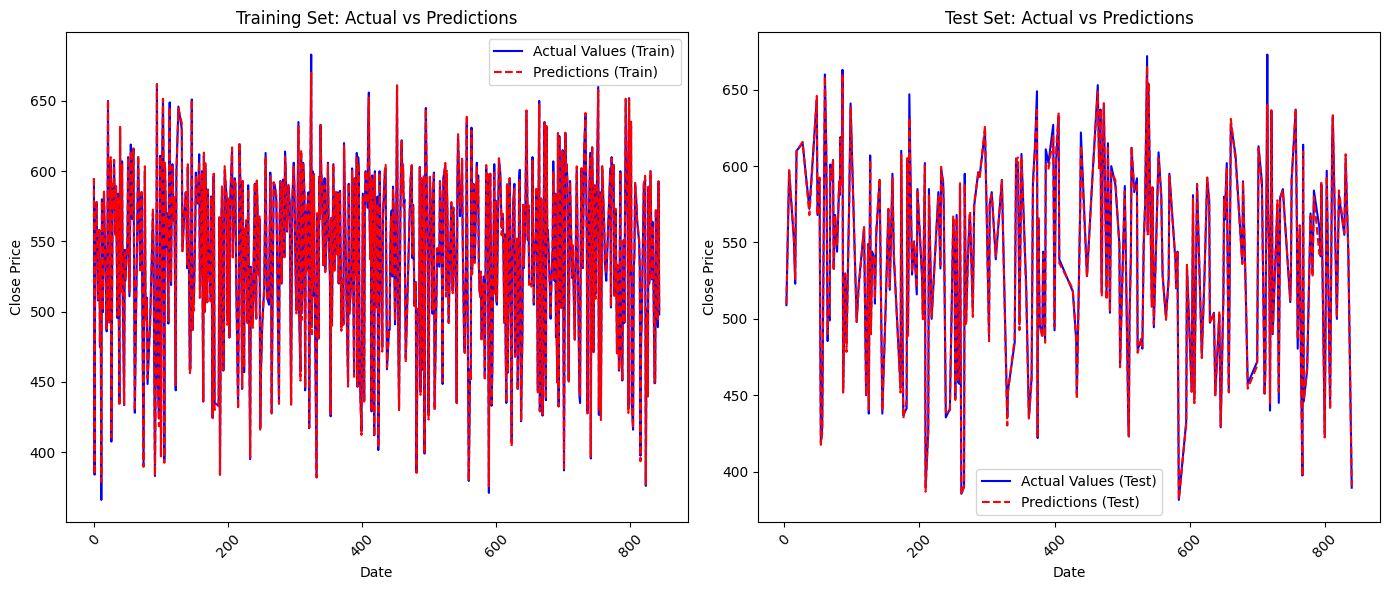

Best PCA n_components: 4
SVR with Best PCA Evaluation:
SVR with Best PCA Evaluation:
均方误差 (MSE): 123.20617530172159
均方根误差 (RMSE): 11.099827714956731
平均绝对误差 (MAE): 4.7485323021998616
R-squared score: 0.9711465932485865
在容忍度 1.0% 范围内的正确比率: 0.82
----------------------------------------


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

def feature_selection_and_svr(features):
    tdf = pd.DataFrame()
    tdf['Target'] = data['Close']
    
    x = data[features].values
    y = tdf['Target'].values
    x_train, x_test, y_train, y_test, train_index, test_index = train_test_split(
        x, y, data.index, test_size=0.3, random_state=39830
    )

    # 特征选择
    selector = SelectKBest(score_func=f_regression, k='all')
    selector.fit(x_train, y_train)
    
    # 选择所有特征的得分
    scores = selector.scores_
    feature_scores = dict(zip(features, scores))
    sorted_features = sorted(feature_scores, key=feature_scores.get, reverse=True)
    
    # 选择前 K 个最重要的特征
    k = min(len(features), 10)  # 选择前 10 个特征，或更多/更少根据需要
    top_features = sorted_features[:k]
    print(f"Top {k} features selected: {top_features}")

    # 使用 get_loc 方法查找特征索引
    feature_index = {f: idx for idx, f in enumerate(features)}
    
    # 使用选择的特征训练 SVR
    x_train_selected = x_train[:, [feature_index[f] for f in top_features]]
    x_test_selected = x_test[:, [feature_index[f] for f in top_features]]
    svr_model = SVR(kernel='rbf', C=100, gamma='scale')
    svr_model.fit(x_train_selected, y_train)
    
    # 获取训练集和测试集的预测值
    predictions_train = svr_model.predict(x_train_selected)
    predictions_test = svr_model.predict(x_test_selected)
    
    # 打印模型评估结果
    print("SVR with Selected Features Evaluation:")
    evaluate_model(y_train, predictions_train, "SVR with Selected Features (Train)")
    evaluate_model(y_test, predictions_test, "SVR with Selected Features (Test)")

    # 绘制实际值与预测值的折线图
    plot_predictions_vs_actuals(data, train_index, test_index, y_train, y_test, predictions_train, predictions_test)

    # 使用 PCA 进行降维，评估每个 PCA 组件数下的模型
    best_n_components = 0
    best_score = -float('inf')
    best_pca = None
    best_model = None
    best_predictions = None

    # 选择 1 到特征数的范围
    for i in range(1, k + 1):
        pca = PCA(n_components=i, whiten=True)
        x_train_pca = pca.fit_transform(x_train)
        x_test_pca = pca.transform(x_test)
        
        # 使用 PCA 转换后的数据训练 SVR
        svr_model_pca = SVR(kernel='rbf', C=100, gamma='scale')
        svr_model_pca.fit(x_train_pca, y_train)
        
        predictions_pca = svr_model_pca.predict(x_test_pca)
        
        # 评估模型性能
        score = mean_squared_error(y_test, predictions_pca)
        r2 = r2_score(y_test, predictions_pca)
        
        # print(f"n_components = {i}, MSE = {score}, R-squared = {r2}")
        
        # 选择表现最佳的 PCA 组件数
        if r2 > best_score:
            best_score = r2
            best_n_components = i
            best_pca = pca
            best_model = svr_model_pca
            best_predictions = predictions_pca

    print(f'Best PCA n_components: {best_n_components}')
    # print(pca.components_)
    
    # 打印最佳 PCA 模型的评估结果
    print("SVR with Best PCA Evaluation:")
    evaluate_model(y_test, best_predictions, "SVR with Best PCA")

def plot_predictions_vs_actuals(data, train_index, test_index, y_train, y_test, predictions_train, predictions_test):
    """
    绘制训练集和测试集的实际值与预测值的折线图。
    
    Parameters:
    - data: 包含 'Close' 列的 DataFrame，索引应为日期
    - train_index: 训练集的索引
    - test_index: 测试集的索引
    - y_train: 训练集的实际值
    - y_test: 测试集的实际值
    - predictions_train: 训练集的预测值
    - predictions_test: 测试集的预测值
    """
    
    # 确保 'Date' 列是索引
    if data.index.name != 'Date':
        # 'Date' 列已经是索引
        data.index.name = 'Date'
    
    # 获取训练集和测试集的日期
    train_dates = data.index[data.index.isin(train_index)]
    test_dates = data.index[data.index.isin(test_index)]
    
    # 验证维度匹配
    if len(train_dates) != len(y_train) or len(test_dates) != len(y_test):
        raise ValueError("The length of train_dates or test_dates does not match the length of y_train or y_test.")
    
    # 绘制训练集的实际值与预测值
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_dates, y_train, label='Actual Values (Train)', color='blue')
    plt.plot(train_dates, predictions_train, label='Predictions (Train)', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Training Set: Actual vs Predictions')
    plt.legend()
    plt.xticks(rotation=45)
    
    # 绘制测试集的实际值与预测值
    plt.subplot(1, 2, 2)
    plt.plot(test_dates, y_test, label='Actual Values (Test)', color='blue')
    plt.plot(test_dates, predictions_test, label='Predictions (Test)', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Test Set: Actual vs Predictions')
    plt.legend()
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


# 假设 data 是你的 DataFrame 和 features 是你的特征列表
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'sma', 'rsi', 'ma', 'std_dev', 'upperband', 'lowerband', 'EMA12', 'EMA26', 'MACD', 'Signal_Line', 'MACD_Histogram']
feature_selection_and_svr(features)


Top 10 features selected: ['High', 'Low', 'Open', 'Adj Close', 'EMA12', 'EMA26', 'sma', 'ma', 'upperband', 'lowerband']
SVR with Selected Features Evaluation:
SVR with Selected Features (Train) Evaluation:
均方误差 (MSE): 5.626980476804354
均方根误差 (RMSE): 2.372125729552368
平均绝对误差 (MAE): 1.722434795032284
R-squared score: 0.9988614588488859
在容忍度 1.0% 范围内的正确比率: 0.97
----------------------------------------
SVR with Selected Features (Test) Evaluation:
均方误差 (MSE): 57.452804173197535
均方根误差 (RMSE): 7.57976280454722
平均绝对误差 (MAE): 6.504803089527961
R-squared score: 0.9024927321592303
在容忍度 1.0% 范围内的正确比率: 0.46
----------------------------------------


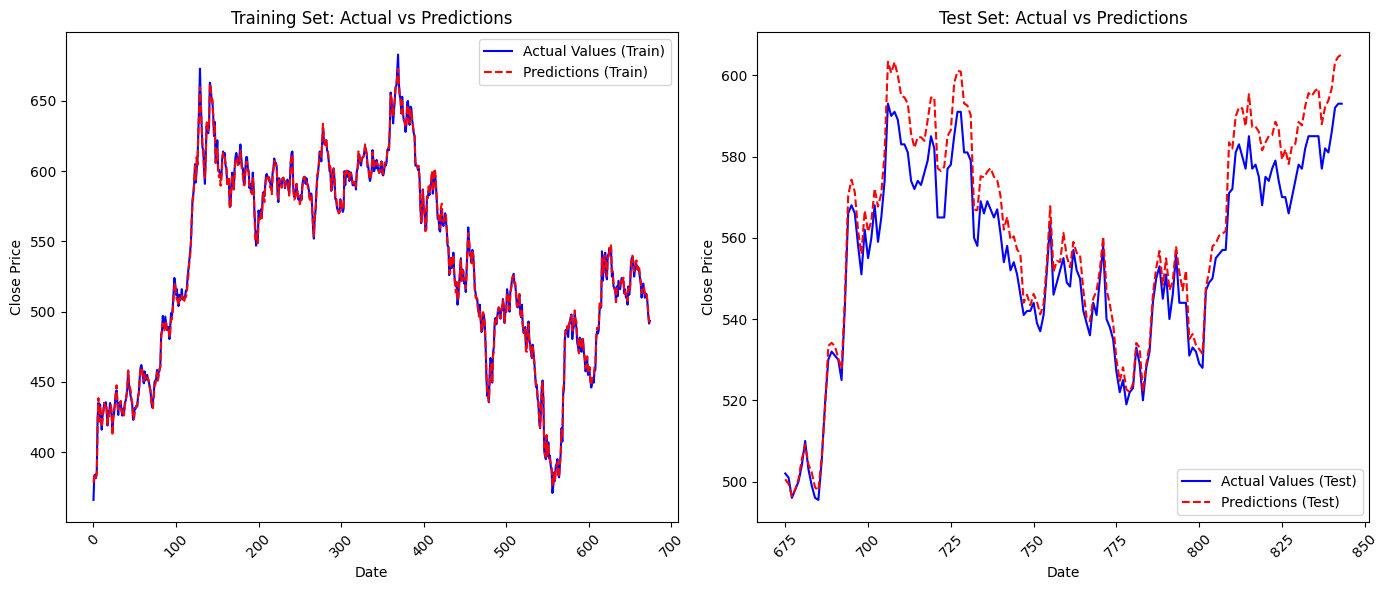

Best PCA n_components: 3
SVR with Best PCA Evaluation:
SVR with Best PCA Evaluation:
均方误差 (MSE): 22.702919149917378
均方根误差 (RMSE): 4.764758036870012
平均绝对误差 (MAE): 3.696946750671345
R-squared score: 0.9614692502798488
在容忍度 1.0% 范围内的正确比率: 0.78
----------------------------------------


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

def feature_selection_and_svr(features):
    # 目标数据
    tdf = pd.DataFrame()
    tdf['Target'] = data['Close']
    
    # 特征数据
    x = data[features].values
    y = tdf['Target'].values
    
    # 指定训练集（前80%）和测试集（后20%）
    train_size = int(len(data) * 0.8)
    x_train, x_test = x[:train_size], x[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # 使用整个数据集的索引作为测试集
    train_index = data.index[:train_size]
    test_index = data.index[train_size:]

    # 特征选择
    selector = SelectKBest(score_func=f_regression, k='all')
    selector.fit(x_train, y_train)
    
    # 选择所有特征的得分
    scores = selector.scores_
    feature_scores = dict(zip(features, scores))
    sorted_features = sorted(feature_scores, key=feature_scores.get, reverse=True)
    
    # 选择前 K 个最重要的特征
    k = min(len(features), 10)  # 选择前 10 个特征，或更多/更少根据需要
    top_features = sorted_features[:k]
    print(f"Top {k} features selected: {top_features}")

    # 使用 get_loc 方法查找特征索引
    feature_index = {f: idx for idx, f in enumerate(features)}
    
    # 使用选择的特征训练 SVR
    x_train_selected = x_train[:, [feature_index[f] for f in top_features]]
    x_test_selected = x_test[:, [feature_index[f] for f in top_features]]
    svr_model = SVR(kernel='rbf', C=100, gamma='scale')
    svr_model.fit(x_train_selected, y_train)
    
    # 获取训练集和测试集的预测值
    predictions_train = svr_model.predict(x_train_selected)
    predictions_test = svr_model.predict(x_test_selected)
    
    # 打印模型评估结果
    print("SVR with Selected Features Evaluation:")
    evaluate_model(y_train, predictions_train, "SVR with Selected Features (Train)")
    evaluate_model(y_test, predictions_test, "SVR with Selected Features (Test)")

    # 绘制实际值与预测值的折线图
    plot_predictions_vs_actuals(data, train_index, test_index, y_train, y_test, predictions_train, predictions_test)

    # 使用 PCA 进行降维，评估每个 PCA 组件数下的模型
    best_n_components = 0
    best_score = -float('inf')
    best_pca = None
    best_model = None
    best_predictions = None

    # 选择 1 到特征数的范围
    for i in range(1, k + 1):
        pca = PCA(n_components=i, whiten=True)
        x_train_pca = pca.fit_transform(x_train)
        x_test_pca = pca.transform(x_test)
        
        # 使用 PCA 转换后的数据训练 SVR
        svr_model_pca = SVR(kernel='rbf', C=100, gamma='scale')
        svr_model_pca.fit(x_train_pca, y_train)
        
        predictions_pca = svr_model_pca.predict(x_test_pca)
        
        # 评估模型性能
        score = mean_squared_error(y_test, predictions_pca)
        r2 = r2_score(y_test, predictions_pca)
        
        # print(f"n_components = {i}, MSE = {score}, R-squared = {r2}")
        
        # 选择表现最佳的 PCA 组件数
        if r2 > best_score:
            best_score = r2
            best_n_components = i
            best_pca = pca
            best_model = svr_model_pca
            best_predictions = predictions_pca

    print(f'Best PCA n_components: {best_n_components}')
    # print(pca.components_)
    
    # 打印最佳 PCA 模型的评估结果
    print("SVR with Best PCA Evaluation:")
    evaluate_model(y_test, best_predictions, "SVR with Best PCA")

def plot_predictions_vs_actuals(data, train_index, test_index, y_train, y_test, predictions_train, predictions_test):
    """
    绘制训练集和测试集的实际值与预测值的折线图。
    
    Parameters:
    - data: 包含 'Date' 和 'Close' 列的 DataFrame
    - train_index: 训练集的索引
    - test_index: 测试集的索引
    - y_train: 训练集的实际值
    - y_test: 测试集的实际值
    - predictions_train: 训练集的预测值
    - predictions_test: 测试集的预测值
    """
    
    # 确保 'Date' 列是索引
    if data.index.name != 'Date':
        # 'Date' 列已经是索引
        data.index.name = 'Date'
    
    # 获取训练集和测试集的日期
    train_dates = data.index[data.index.isin(train_index)]
    test_dates = data.index[data.index.isin(test_index)]
    
    # 验证维度匹配
    if len(train_dates) != len(y_train) or len(test_dates) != len(y_test):
        raise ValueError("The length of train_dates or test_dates does not match the length of y_train or y_test.")
    
    # 绘制训练集的实际值与预测值
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_dates, y_train, label='Actual Values (Train)', color='blue')
    plt.plot(train_dates, predictions_train, label='Predictions (Train)', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Training Set: Actual vs Predictions')
    plt.legend()
    plt.xticks(rotation=45)
    
    # 绘制测试集的实际值与预测值
    plt.subplot(1, 2, 2)
    plt.plot(test_dates, y_test, label='Actual Values (Test)', color='blue')
    plt.plot(test_dates, predictions_test, label='Predictions (Test)', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Test Set: Actual vs Predictions')
    plt.legend()
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

def evaluate_model(y_true, y_pred, model_name):
    merror = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(merror)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Evaluation:")
    print(f'均方误差 (MSE): {merror}')
    print(f'均方根误差 (RMSE): {rmse}')
    print(f'平均绝对误差 (MAE): {mae}')
    print(f'R-squared score: {r2}')
    tolerance_percentage = 0.01  # 1%

    # 计算容忍度阈值
    tolerance_threshold = tolerance_percentage * np.abs(y_true)

    # 计算绝对误差
    absolute_errors = np.abs(y_pred - y_true)

    # 计算在容忍度范围内的正确比率
    correct_within_tolerance = np.mean(absolute_errors <= tolerance_threshold)
    print(f'在容忍度 {tolerance_percentage*100}% 范围内的正确比率: {correct_within_tolerance:.2f}')
    print('-' * 40)

feature_selection_and_svr(features)


Top 5 features selected: ['High', 'Low', 'Open', 'Adj Close', 'EMA12']
Cross-validation MSE (without PCA): 7.8752 ± 2.7020
Cross-validation MAE (without PCA): 2.0101 ± 0.2021
Cross-validation R-squared (without PCA): 0.9981 ± 0.0007
Cross-validation SVR (without PCA) - MSE: 5.5044, MAE: 1.8908, R-squared: 0.9988
在容忍度 1.0% 范围内的正确比率: 0.96


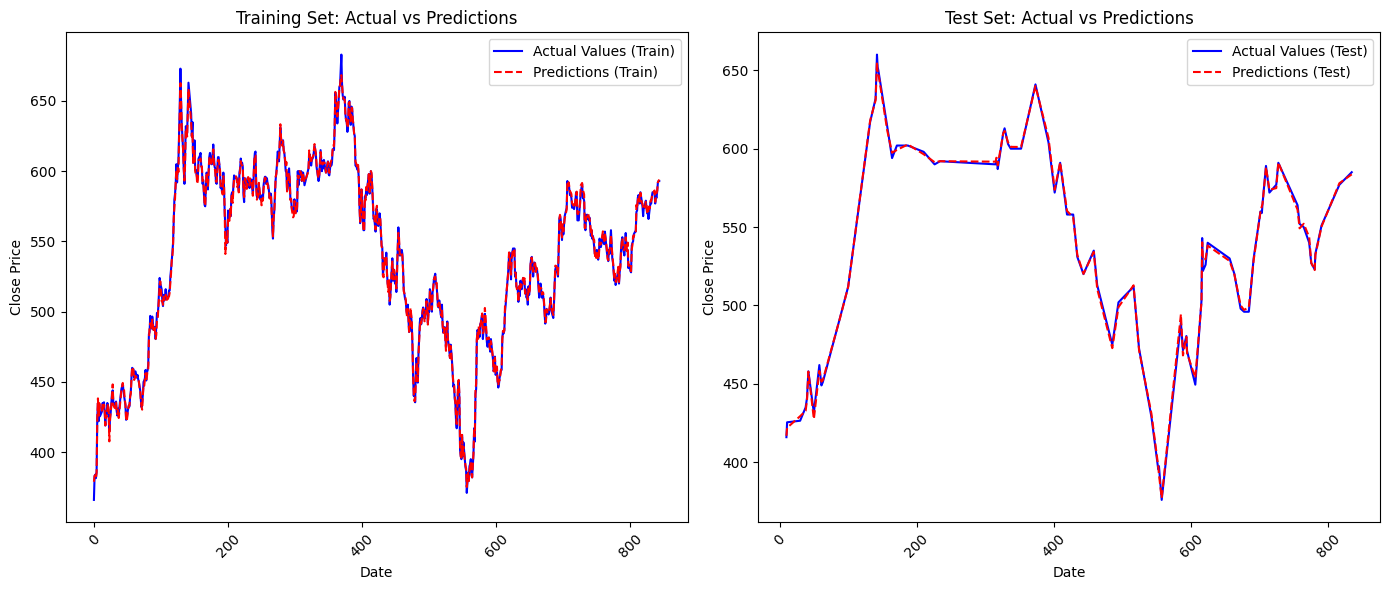

Best PCA n_components: 2
SVR with Best PCA Evaluation:
Cross-validation SVR with Best PCA - MSE: 11.4861, MAE: 2.4871, R-squared: 0.9974
在容忍度 1.0% 范围内的正确比率: 0.90


In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

def evaluate_model(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} - MSE: {mse:.4f}, MAE: {mae:.4f}, R-squared: {r2:.4f}")

    tolerance_percentage = 0.01  # 1%
    # 计算容忍度阈值
    tolerance_threshold = tolerance_percentage * np.abs(y_true)

    # 计算绝对误差
    absolute_errors = np.abs(y_pred - y_true)

    # 计算在容忍度范围内的正确比率
    correct_within_tolerance = np.mean(absolute_errors <= tolerance_threshold)
    print(f'在容忍度 {tolerance_percentage*100}% 范围内的正确比率: {correct_within_tolerance:.2f}')

def feature_selection_and_svr(features, fold):
    tdf = pd.DataFrame()
    tdf['Target'] = data['Close']
    
    x = data[features].values
    y = tdf['Target'].values

    # 特征选择
    selector = SelectKBest(score_func=f_regression, k='all')
    selector.fit(x, y)
    
    # 选择所有特征的得分
    scores = selector.scores_
    feature_scores = dict(zip(features, scores))
    sorted_features = sorted(feature_scores, key=feature_scores.get, reverse=True)
    
    # 选择前 K 个最重要的特征
    k = min(len(features), 10)  # 选择前 10 个特征，或更多/更少根据需要
    top_features = sorted_features[:k]
    print(f"Top {k} features selected: {top_features}")

    # 使用 get_loc 方法查找特征索引
    feature_index = {f: idx for idx, f in enumerate(features)}
    
    # 使用选择的特征
    x_selected = x[:, [feature_index[f] for f in top_features]]

    # 标准化特征
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x_selected)

    # 交叉验证
    kf = KFold(n_splits=fold, shuffle=True, random_state=39830)
    
    # 没有 PCA 的 SVR
    svr_model = SVR(kernel='rbf', C=100, gamma='scale')
    
    mse_scores = []
    mae_scores = []
    r2_scores = []

    for train_index, test_index in kf.split(x_scaled):
        x_train, x_test = x_scaled[train_index], x_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        svr_model.fit(x_train, y_train)
        predictions_test = svr_model.predict(x_test)
        
        # 记录每折的评估指标
        mse_scores.append(mean_squared_error(y_test, predictions_test))
        mae_scores.append(mean_absolute_error(y_test, predictions_test))
        r2_scores.append(r2_score(y_test, predictions_test))

    print(f"Cross-validation MSE (without PCA): {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
    print(f"Cross-validation MAE (without PCA): {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
    print(f"Cross-validation R-squared (without PCA): {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
    evaluate_model(y_test, predictions_test, "Cross-validation SVR (without PCA)")

    # 绘制训练集和测试集的实际值与预测值的折线图
    # 注意：在交叉验证中，数据集被分割成多个训练集和测试集，因此这里展示的绘图是最后一个折叠的结果
    x_train, x_test = x_scaled[train_index], x_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    predictions_train = svr_model.predict(x_train)
    predictions_test = svr_model.predict(x_test)
    plot_predictions_vs_actuals(data, data.index[train_index], data.index[test_index], y_train, y_test, predictions_train, predictions_test)

    # 使用 PCA 进行降维，评估每个 PCA 组件数下的模型
    best_n_components = 0
    best_score = -float('inf')
    best_pca = None
    best_model = None
    best_predictions = None

    for i in range(1, k + 1):
        pca = PCA(n_components=i, whiten=True)
        x_scaled_pca = pca.fit_transform(x_scaled)
        
        mse_scores = []
        r2_scores = []

        for train_index, test_index in kf.split(x_scaled_pca):
            x_train_pca, x_test_pca = x_scaled_pca[train_index], x_scaled_pca[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            svr_model_pca = SVR(kernel='rbf', C=100, gamma='scale')
            svr_model_pca.fit(x_train_pca, y_train)
            predictions_pca = svr_model_pca.predict(x_test_pca)
            
            mse_scores.append(mean_squared_error(y_test, predictions_pca))
            r2_scores.append(r2_score(y_test, predictions_pca))

        mean_r2 = np.mean(r2_scores)
        if mean_r2 > best_score:
            best_score = mean_r2
            best_n_components = i
            best_pca = pca
            best_model = svr_model_pca

    print(f'Best PCA n_components: {best_n_components}')

    # 打印最佳 PCA 模型的评估结果
    if best_model:
        x_scaled_pca = best_pca.transform(x_scaled)
        x_train_pca, x_test_pca = x_scaled_pca[train_index], x_scaled_pca[test_index]
        y_train, y_test = y[train_index], y[test_index]
        best_predictions = best_model.predict(x_test_pca)
        
        print("SVR with Best PCA Evaluation:")
        evaluate_model(y_test, best_predictions, "Cross-validation SVR with Best PCA")

def plot_predictions_vs_actuals(data, train_index, test_index, y_train, y_test, predictions_train, predictions_test):
    """
    绘制训练集和测试集的实际值与预测值的折线图。
    
    Parameters:
    - data: 包含 'Close' 列的 DataFrame，索引应为日期
    - train_index: 训练集的索引
    - test_index: 测试集的索引
    - y_train: 训练集的实际值
    - y_test: 测试集的实际值
    - predictions_train: 训练集的预测值
    - predictions_test: 测试集的预测值
    """
    
    # 确保 'Date' 列是索引
    if data.index.name != 'Date':
        data.index.name = 'Date'
    
    # 获取训练集和测试集的日期
    train_dates = data.index[data.index.isin(train_index)]
    test_dates = data.index[data.index.isin(test_index)]
    
    # 验证维度匹配
    if len(train_dates) != len(y_train) or len(test_dates) != len(y_test):
        raise ValueError("The length of train_dates or test_dates does not match the length of y_train or y_test.")
    
    # 绘制训练集的实际值与预测值
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_dates, y_train, label='Actual Values (Train)', color='blue')
    plt.plot(train_dates, predictions_train, label='Predictions (Train)', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Training Set: Actual vs Predictions')
    plt.legend()
    plt.xticks(rotation=45)
    
    # 绘制测试集的实际值与预测值
    plt.subplot(1, 2, 2)
    plt.plot(test_dates, y_test, label='Actual Values (Test)', color='blue')
    plt.plot(test_dates, predictions_test, label='Predictions (Test)', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Test Set: Actual vs Predictions')
    plt.legend()
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# 运行没有 PCA 的 SVR
feature_selection_and_svr(features=features, fold=10)


Top 10 features selected: ['High', 'Low', 'Open', 'Adj Close', 'EMA12', 'EMA26', 'sma', 'ma', 'upperband', 'lowerband']
Fold 1: MSE: 5.7574, MAE: 2.0327, R-squared: 0.9986
Fold 2: MSE: 9.9511, MAE: 2.3703, R-squared: 0.9977
Fold 3: MSE: 12.8994, MAE: 1.9999, R-squared: 0.9971
Fold 4: MSE: 11.4998, MAE: 2.3049, R-squared: 0.9977
Fold 5: MSE: 5.2152, MAE: 1.7504, R-squared: 0.9986
Fold 6: MSE: 7.6684, MAE: 1.9408, R-squared: 0.9976
Fold 7: MSE: 6.2331, MAE: 1.9763, R-squared: 0.9985
Fold 8: MSE: 5.9422, MAE: 1.8667, R-squared: 0.9984
Fold 9: MSE: 5.1361, MAE: 1.6456, R-squared: 0.9988
Fold 10: MSE: 4.3137, MAE: 1.6251, R-squared: 0.9990


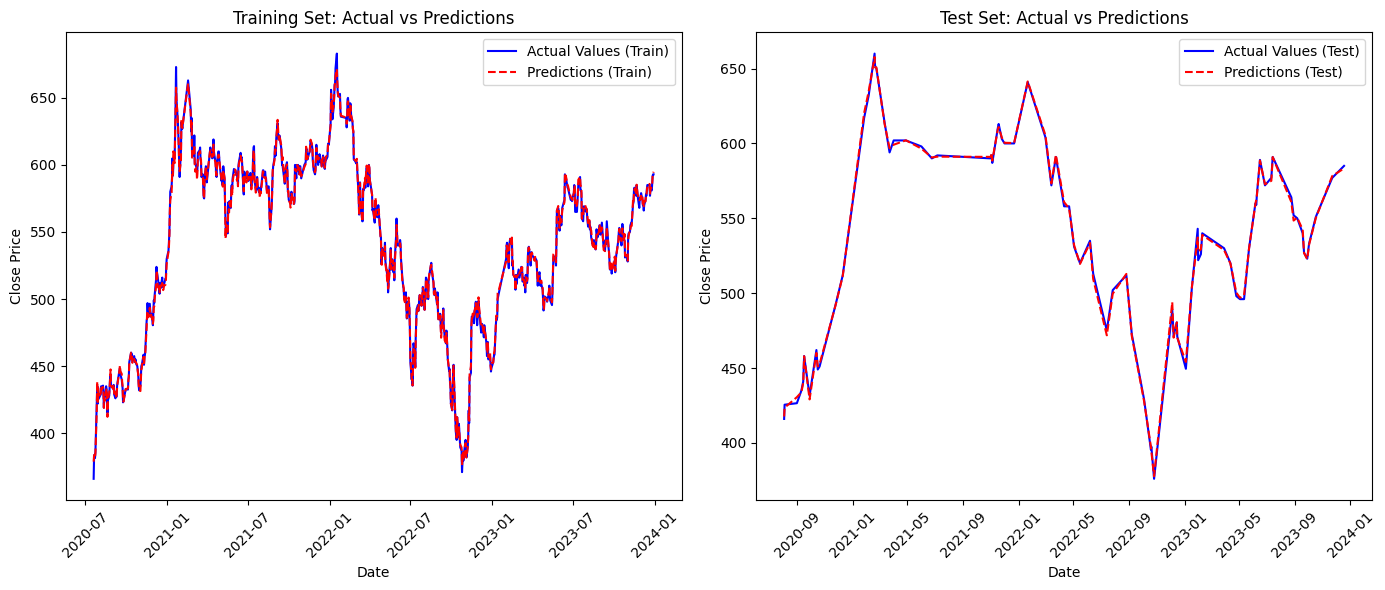


Overall Cross-validation Results (without PCA):
Mean MSE: 7.4616 ± 2.8143
Mean MAE: 1.9513 ± 0.2362
Mean R-squared: 0.9982 ± 0.0006
在容忍度 1.0% 范围内的正确比率: 0.96

Detailed Fold Results (without PCA):
   Fold        MSE       MAE  R-squared
0     1   5.757419  2.032725   0.998551
1     2   9.951059  2.370334   0.997704
2     3  12.899365  1.999905   0.997066
3     4  11.499786  2.304879   0.997684
4     5   5.215236  1.750378   0.998593
5     6   7.668356  1.940776   0.997615
6     7   6.233145  1.976298   0.998501
7     8   5.942222  1.866656   0.998438
8     9   5.136128  1.645568   0.998757
9    10   4.313699  1.625134   0.999022
Best PCA n_components: 3
SVR with Best PCA Evaluation:
Cross-validation SVR with Best PCA - MSE: 10.9170, MAE: 2.3903, R-squared: 0.9975
在容忍度 1.0% 范围内的正确比率: 0.90


In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

def evaluate_model(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} - MSE: {mse:.4f}, MAE: {mae:.4f}, R-squared: {r2:.4f}")

    tolerance_percentage = 0.01  # 1%
    # 计算容忍度阈值
    tolerance_threshold = tolerance_percentage * np.abs(y_true)

    # 计算绝对误差
    absolute_errors = np.abs(y_pred - y_true)

    # 计算在容忍度范围内的正确比率
    correct_within_tolerance = np.mean(absolute_errors <= tolerance_threshold)
    print(f'在容忍度 {tolerance_percentage*100}% 范围内的正确比率: {correct_within_tolerance:.2f}')

def feature_selection_and_svr(features, fold,tolerance_percentage):
    tdf = pd.DataFrame()
    tdf['Target'] = data['Close']
    
    x = data[features].values
    y = tdf['Target'].values

    # 特征选择
    selector = SelectKBest(score_func=f_regression, k='all')
    selector.fit(x, y)
    
    # 选择所有特征的得分
    scores = selector.scores_
    feature_scores = dict(zip(features, scores))
    sorted_features = sorted(feature_scores, key=feature_scores.get, reverse=True)
    
    # 选择前 K 个最重要的特征
    k = min(len(features), 10)  # 选择前 10 个特征，或更多/更少根据需要
    top_features = sorted_features[:k]
    print(f"Top {k} features selected: {top_features}")

    # 使用 get_loc 方法查找特征索引
    feature_index = {f: idx for idx, f in enumerate(features)}
    
    # 使用选择的特征
    x_selected = x[:, [feature_index[f] for f in top_features]]

    # # 标准化特征
    # scaler = StandardScaler()
    # x_scaled = scaler.fit_transform(x_selected)

    # 交叉验证
    kf = KFold(n_splits=fold, shuffle=True, random_state=39830)
    
    svr_model = SVR(kernel='rbf', C=100, gamma='scale')
    
    mse_scores = []
    mae_scores = []
    r2_scores = []
    fold_results = []
    all_absolute_errors = []  # 保存所有折的绝对误差

    for fold_index, (train_index, test_index) in enumerate(kf.split(x_selected), 1):
        x_train, x_test = x_selected[train_index], x_selected[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        svr_model.fit(x_train, y_train)
        predictions_test = svr_model.predict(x_test)
        
        mse = mean_squared_error(y_test, predictions_test)
        mae = mean_absolute_error(y_test, predictions_test)
        r2 = r2_score(y_test, predictions_test)
        
        mse_scores.append(mse)
        mae_scores.append(mae)
        r2_scores.append(r2)
        
        # 计算绝对误差
        absolute_errors = np.abs(predictions_test - y_test)
        all_absolute_errors.extend(absolute_errors)
        
        fold_results.append({
            'Fold': fold_index,
            'MSE': mse,
            'MAE': mae,
            'R-squared': r2
        })
        
        print(f"Fold {fold_index}: MSE: {mse:.4f}, MAE: {mae:.4f}, R-squared: {r2:.4f}")

        # 绘制最后一折的训练集和测试集的实际值与预测值的折线图
        if fold_index == fold:
            x_train, x_test = x_selected[train_index], x_selected[test_index]
            y_train, y_test = y[train_index], y[test_index]
            predictions_train = svr_model.predict(x_train)
            predictions_test = svr_model.predict(x_test)
            plot_predictions_vs_actuals(data, data.index[train_index], data.index[test_index], y_train, y_test, predictions_train, predictions_test)

    print(f"\nOverall Cross-validation Results (without PCA):")
    print(f"Mean MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
    print(f"Mean MAE: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
    print(f"Mean R-squared: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
    
    
    tolerance_threshold = tolerance_percentage * np.mean(y)  # 基于目标变量的平均值计算容忍度阈值

    # 计算容忍度范围内的正确比率
    correct_within_tolerance = np.mean(np.array(all_absolute_errors) <= tolerance_threshold)
    print(f'在容忍度 {tolerance_percentage*100}% 范围内的正确比率: {correct_within_tolerance:.2f}')

    # 打印每一折的详细结果
    fold_results_df = pd.DataFrame(fold_results)
    print(f"\nDetailed Fold Results (without PCA):")
    print(fold_results_df)

    # 使用 PCA 进行降维，评估每个 PCA 组件数下的模型
    best_n_components = 0
    best_score = -float('inf')
    best_pca = None
    best_model = None
    best_predictions = None

    for i in range(1, k + 1):
        pca = PCA(n_components=i, whiten=True)
        x_scaled_pca = pca.fit_transform(x_selected)
        
        mse_scores = []
        r2_scores = []

        for fold_index, (train_index, test_index) in enumerate(kf.split(x_scaled_pca), 1):
            x_train_pca, x_test_pca = x_scaled_pca[train_index], x_scaled_pca[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            svr_model_pca = SVR(kernel='rbf', C=100, gamma='scale')
            svr_model_pca.fit(x_train_pca, y_train)
            predictions_pca = svr_model_pca.predict(x_test_pca)
            
            mse_scores.append(mean_squared_error(y_test, predictions_pca))
            r2_scores.append(r2_score(y_test, predictions_pca))

        mean_r2 = np.mean(r2_scores)
        if mean_r2 > best_score:
            best_score = mean_r2
            best_n_components = i
            best_pca = pca
            best_model = svr_model_pca

    print(f'Best PCA n_components: {best_n_components}')

    # 打印最佳 PCA 模型的评估结果
    if best_model:
        x_scaled_pca = best_pca.transform(x_selected)
        x_train_pca, x_test_pca = x_scaled_pca[train_index], x_scaled_pca[test_index]
        y_train, y_test = y[train_index], y[test_index]
        best_predictions = best_model.predict(x_test_pca)
        
        print("SVR with Best PCA Evaluation:")
        evaluate_model(y_test, best_predictions, "Cross-validation SVR with Best PCA")

def plot_predictions_vs_actuals(data, train_index, test_index, y_train, y_test, predictions_train, predictions_test):
    """
    绘制训练集和测试集的实际值与预测值的折线图。
    
    Parameters:
    - data: 包含 'Close' 和 'Date' 列的 DataFrame
    - train_index: 训练集的索引
    - test_index: 测试集的索引
    - y_train: 训练集的实际值
    - y_test: 测试集的实际值
    - predictions_train: 训练集的预测值
    - predictions_test: 测试集的预测值
    """
    
    # 确保 'Date' 列是日期类型
    if not pd.api.types.is_datetime64_any_dtype(data['Date']):
        data['Date'] = pd.to_datetime(data['Date'])
    
    # 获取训练集和测试集的实际日期
    train_dates = data.loc[train_index, 'Date']
    test_dates = data.loc[test_index, 'Date']
    
    # 验证维度匹配
    if len(train_dates) != len(y_train) or len(test_dates) != len(y_test):
        raise ValueError("The length of train_dates or test_dates does not match the length of y_train or y_test.")
    
    # 绘制训练集的实际值与预测值
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_dates, y_train, label='Actual Values (Train)', color='blue')
    plt.plot(train_dates, predictions_train, label='Predictions (Train)', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Training Set: Actual vs Predictions')
    plt.legend()
    plt.xticks(rotation=45)
    
    # 绘制测试集的实际值与预测值
    plt.subplot(1, 2, 2)
    plt.plot(test_dates, y_test, label='Actual Values (Test)', color='blue')
    plt.plot(test_dates, predictions_test, label='Predictions (Test)', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Test Set: Actual vs Predictions')
    plt.legend()
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


# 运行没有 PCA 的 SVR
feature_selection_and_svr(features=features, fold=10,tolerance_percentage = 0.01)
